# Customer segmentation on Wholesale customers data using Cluster Analysis

What is customer sugmentation?

It is the practice of dividing a customer base into groups of individuals that are similar in specific ways relevant to marketing, such as age ,gender,interests and spending habits.

What is cluster analysis?

Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning.

Clustering or cluster analysis is an unsupervised technique.

# Data description

The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

Source : Margarida G. M. S. Cardoso, margarida.cardoso '@' iscte.pt, ISCTE-IUL, Lisbon, Portugal

Attribute information

The data set has 8 variables and 440 observations

1) FRESH: annual spending (m.u.) on fresh products (Continuous);
2) MILK: annual spending (m.u.) on milk products (Continuous);
3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
7) CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
8) REGION: customersâ€™ Region â€“ Lisbnon, Oporto or Other (Nominal)



In [1]:
#Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy.stats import skew
import scipy.stats as stats

In [6]:
#Importing the raw data-set
mydata=pd.read_csv("C:\\Users\\Admin\\Desktop\\Wholesale customers data.csv")

# Exploratory data analysis

In [7]:
#Data dimension
mydata.shape

(440, 8)

In [8]:
#Viewing the data
mydata.head()

#For channel : 1 - Horeca (hotel/restaurant/cafe) ,2 - Retail channel
#For region : 1 - Lisbon, 2 - Oporto , 3 - Other region

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,Retail channel,Other,12669,9656,7561,214,2674,1338
1,Retail channel,Other,7057,9810,9568,1762,3293,1776
2,Retail channel,Other,6353,8808,7684,2405,3516,7844
3,Horeca,Other,13265,1196,4221,6404,507,1788
4,Retail channel,Other,22615,5410,7198,3915,1777,5185


Clearly the data set is fit for either classification or clustering. I have chosen clustering.

In [9]:
#Dataframe size
#Size of a dataframe gives multiplied value of rows and columns (row*column) count
mydata.size

3520

In [10]:
#Variable names
mydata.columns.values

array(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'], dtype=object)

In [11]:
#Checking type of each variable
mydata.dtypes

Channel             object
Region              object
Fresh                int64
Milk                 int64
Grocery              int64
Frozen               int64
Detergents_Paper     int64
Delicassen           int64
dtype: object

In [12]:
#Data info
mydata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null object
Region              440 non-null object
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(6), object(2)
memory usage: 27.6+ KB


In [13]:
#Descriptive statistics of continuous variables
mydata.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [14]:
#Descriptive statistics of categorical variables
mydata.describe(include='O')

#gives frequency only for the top category

#For channel : 1 - Horeca (hotel/restaurant/cafe) ,2 - Retail channel
#For region : 1 - Lisbon, 2 - Oporto , 3 - Other region

,Channel,Region
count,440,440
unique,2,3
top,Horeca,Other
freq,298,316


In [15]:
#List of all unique categories under the categorical variables

pd.unique(mydata['Channel'])



array(['Retail channel', 'Horeca'], dtype=object)

In [16]:
pd.unique(mydata['Region'])

array(['Other', 'Lisnon', 'Oporto'], dtype=object)

In [18]:
#Checking for missing values in the data
missing=mydata.isnull().sum() #isna() can also be used
missing
#There are no missing values in the data set

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [19]:
#% of missing values

print(missing*100/len(mydata))

Channel             0.0
Region              0.0
Fresh               0.0
Milk                0.0
Grocery             0.0
Frozen              0.0
Detergents_Paper    0.0
Delicassen          0.0
dtype: float64


In [20]:
mydata.duplicated()

#False means there are no duplicates

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
410    False
411    False
412    False
413    False
414    False
415    False
416    False
417    False
418    False
419    False
420    False
421    False
422    False
423    False
424    False
425    False
426    False
427    False
428    False
429    False
430    False
431    False
432    False
433    False
434    False
435    False
436    False
437    False
438    False
439    False
Length: 440, dtype: bool

In [21]:
#Storing duplicate values (if any) in a new data frame and printing it so we can easily check if there are duplicates,and if there are then where

duplicates = mydata[mydata.duplicated()]
print(duplicates)

#Empty data frame proves that there are no duplicates in the data

Empty DataFrame
Columns: [Channel, Region, Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen]
Index: []


C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


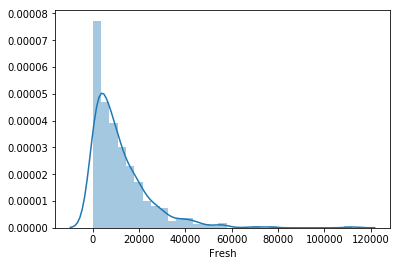

In [22]:
#Distribution plot of all continuous variables

sns.distplot(mydata['Fresh'])

C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


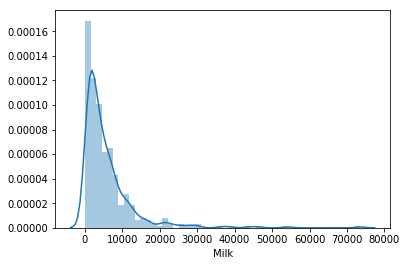

In [23]:
sns.distplot(mydata['Milk'])

C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


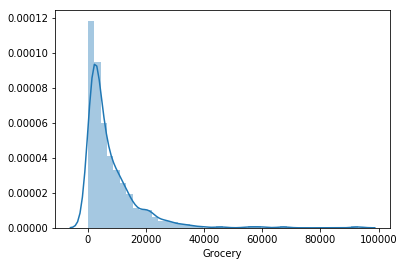

In [24]:
sns.distplot(mydata['Grocery'])

C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


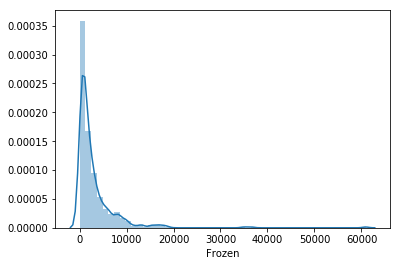

In [25]:
sns.distplot(mydata['Frozen'])

C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


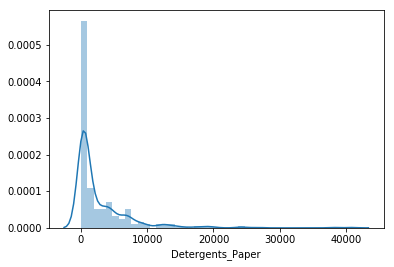

In [26]:
sns.distplot(mydata['Detergents_Paper'])

C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


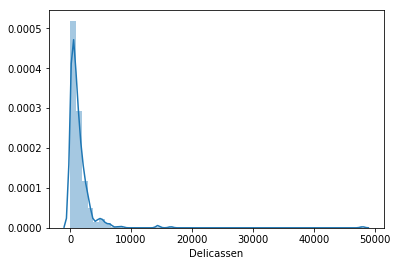

In [27]:
sns.distplot(mydata['Delicassen'])

In [28]:
#skewness co-efficients for all continuous variables
print(mydata['Fresh'].skew())
print(mydata['Milk'].skew())
print(mydata['Grocery'].skew())
print(mydata['Frozen'].skew())
print(mydata['Detergents_Paper'].skew())
print(mydata['Delicassen'].skew())

2.561322751927935
4.053754849210881
3.5874286903915453
5.9079856924559575
3.6318506306913645
11.151586478906117


If skewness is less than −1 or greater than +1, the distribution is highly skewed. If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed. If skewness is between −½ and +½, the distribution is approximately symmetric.

Clearyly,all variables are highly positively/right skewed. The same is proved by the above plots as well.

In [29]:
#Adding a column 'NoOfCustomers' so that pivot operations can be done
mydata['NoOfCustomers'] = 1

In [30]:
mydata.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,NoOfCustomers
0,Retail channel,Other,12669,9656,7561,214,2674,1338,1
1,Retail channel,Other,7057,9810,9568,1762,3293,1776,1
2,Retail channel,Other,6353,8808,7684,2405,3516,7844,1
3,Horeca,Other,13265,1196,4221,6404,507,1788,1
4,Retail channel,Other,22615,5410,7198,3915,1777,5185,1


                NoOfCustomers
Channel                      
Horeca                    298
Retail channel            142


Text(0,0.5,'No of customers')

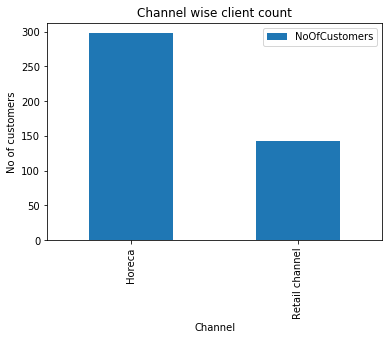

In [44]:
#Channel wise client count
Channel= mydata.pivot_table(values=["NoOfCustomers"],index=["Channel"],aggfunc = len) 
print (Channel)

#298 customers belong to channel 1 and 142 customers belong to channel 2

Channel.plot.bar()
plt.title("Channel wise client count")
plt.ylabel("No of customers")

#The maximum clients of the whole sale distributor are Hotel/Restaurant/Cafe owners

Text(0.5,1,'Region wise client type')

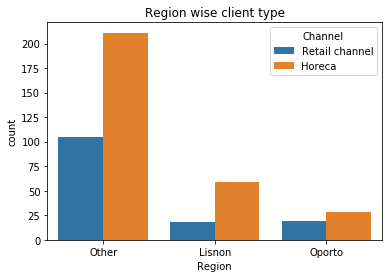

In [41]:
#Region wise client type
sns.countplot(x="Region", data=mydata,hue="Channel")
plt.title("Region wise client type")

#Across all three regions the clients of type1/channel1(Hotel/restaurant/cafe) are more than the clients of type2/channel2(Retail)

        NoOfCustomers
Region               
Lisnon             77
Oporto             47
Other             316


Text(0,0.5,'No of customers')

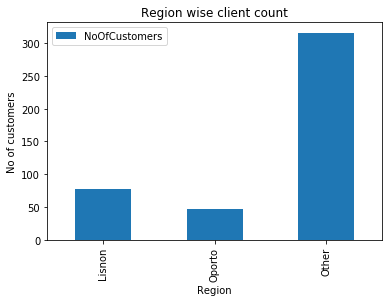

In [48]:
#Region wise client count
Region= mydata.pivot_table(values=["NoOfCustomers"],index=["Region"],aggfunc = len) 
print (Region)

#77 customers are from Lisnon region ,47 from Oporto region and 316 from Other regions
#Maximum number of clients of the wholesale distributor are from the 'Other' regions and the distributor has least number of clients from the Oporto region


Region.plot.bar()
plt.title("Region wise client count")
plt.ylabel("No of customers")

In [49]:
#Creating a data frame of all numeric variables

numeric=mydata.drop(columns=['Channel','Region'])
numeric.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,NoOfCustomers
0,12669,9656,7561,214,2674,1338,1
1,7057,9810,9568,1762,3293,1776,1
2,6353,8808,7684,2405,3516,7844,1
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,1


In [50]:
des=numeric.describe()
desc=des.drop(columns=['NoOfCustomers'])
descr=desc.T
descr

,count,mean,std,min,25%,50%,75%,max
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


Text(0,0.5,'Average spending')

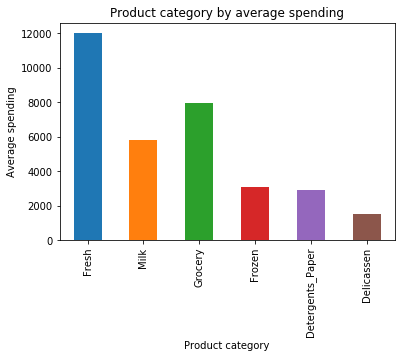

In [52]:
descr['mean'].plot.bar()
plt.title("Product category by average spending")
plt.xlabel("Product category")
plt.ylabel("Average spending")


#On an average clients spend/wholesale distributor earns the most from Fresh products and least from Delicatessen products

#Second most bought/sold category of products being Grocery and third being Milk products

                Delicassen  Detergents_Paper    Fresh   Frozen  Grocery  \
Channel                                                                   
Horeca              421955            235587  4015717  1116979  1180717   
Retail channel      248988           1032270  1264414   234671  2317845   

                   Milk  
Channel                  
Horeca          1028614  
Retail channel  1521743  


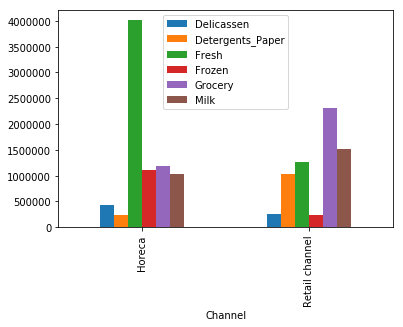

In [53]:
#Channel wise annual spending on different category of products

pivot2= mydata.pivot_table(values=["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicassen"],index=["Channel"],aggfunc = sum) 
print (pivot2)

pivot2.plot.bar()

# Clients who are Hotel/Cafe/Restaurant owners spend most on Fresh products and least on Detergents_paper products and retail clients spend most on Grocery products and least on Frozen products


        Delicassen  Detergents_Paper    Fresh  Frozen  Grocery     Milk
Region                                                                 
Lisnon      104327            204136   854833  231026   570037   422454
Oporto       54506            173311   464721  190132   433274   239144
Other       512110            890410  3960577  930492  2495251  1888759


Text(0,0.5,'Average spending')

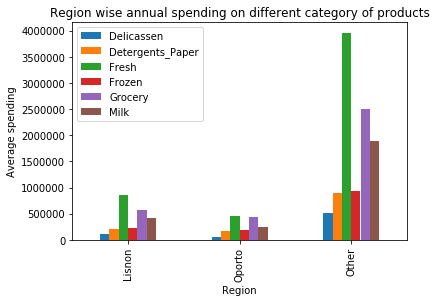

In [54]:
#Region wise annual spending on different category of products

pivot1= mydata.pivot_table(values=["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicassen"],index=["Region"],aggfunc = sum) 
print (pivot1)

pivot1.plot.bar()
plt.title("Region wise annual spending on different category of products")
plt.xlabel("Region")
plt.ylabel("Average spending")

#Across all three regions the annual spending on Fresh products is the highest and the annual spending on Delicatessen products is the lowest


In [55]:
#Univariate analysis of numeric variables
#Quantiles
fresh=pd.DataFrame(numeric.Fresh.quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]))
milk=pd.DataFrame(numeric.Milk.quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]))
grocery=pd.DataFrame(numeric.Grocery.quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]))
frozen=pd.DataFrame(numeric.Frozen.quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]))
detergents_paper=pd.DataFrame(numeric.Detergents_Paper.quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]))
delicassen=pd.DataFrame(numeric.Delicassen.quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]))

In [56]:
quantiles=pd.concat([fresh,milk,grocery,frozen,detergents_paper,delicassen],axis=1)

In [57]:
quantiles

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0.1,915.6,889.8,1381.9,281.3,99.6,180.8
0.2,2609.4,1273.2,1980.8,559.8,216.6,325.4
0.3,4318.8,1893.8,2472.5,859.3,323.2,524.8
0.4,6135.8,2668.2,3315.6,1118.4,488.4,711.2
0.5,8504.0,3627.0,4755.5,1526.0,816.5,965.5
0.6,11148.4,4886.2,6546.4,2206.2,1484.4,1216.2
0.7,14465.9,6282.9,8950.1,2996.8,3164.0,1555.4
0.8,18829.6,8271.8,12125.6,4429.4,4630.0,2127.4
0.9,27090.5,12229.9,18910.1,7545.3,7438.3,2945.9
1.0,112151.0,73498.0,92780.0,60869.0,40827.0,47943.0


In [59]:
num=numeric.drop(columns=["NoOfCustomers"])

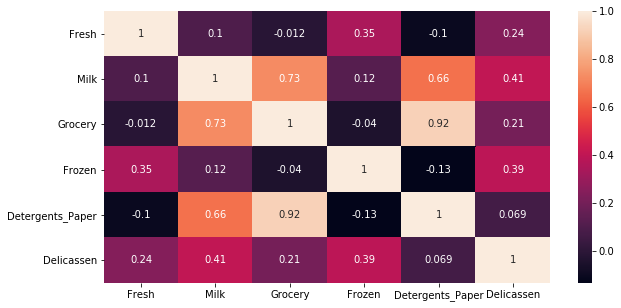

In [60]:
#Checking for correlation among the numeric variables
corr = num.corr()

plt.figure(figsize = (10,5))
ax = sns.heatmap(corr, annot=True)


Strong correlations

1)Grocery and Milk have a strong positive correlation (0.73) - People who buy grocery also buy milk and visa versa

2)Detergents_Paper and Milk have a strong positive correlation (0.66) - People who buy Detergents_Paper products also buy milk and visa versa

3)Detergents_Paper and Grocery have a strong positive correlation (0.92) - People who buy Detergents_Paper products also buy grocery and visa versa


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000001AEDCFAA20>,
      dtype=object)

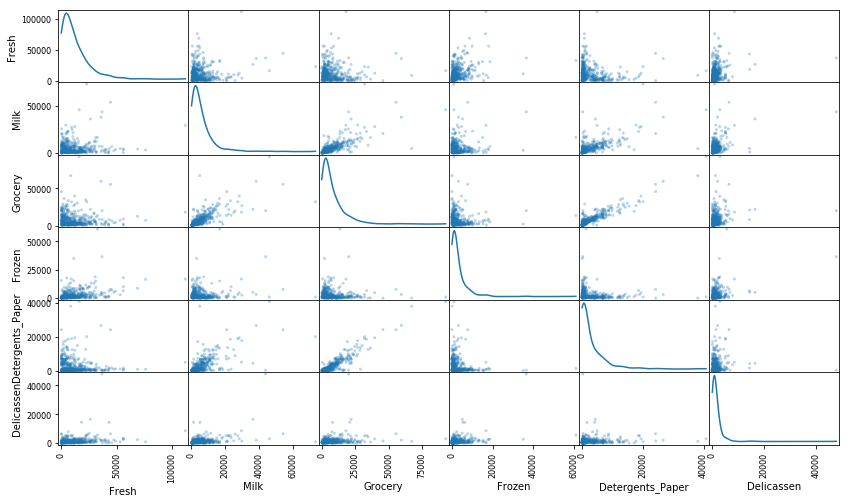

In [61]:
# scatter matrix for each pair of features in the data
pd.scatter_matrix(num, alpha = 0.3, figsize = (14,8), diagonal = 'kde') #kde - kernel density estimation(lines), we can also use 'hist' for histograms

#Data is not normally distributed, it is positively skewed

In [64]:
#Feature scaling

#It is important that all our variables are on the same scale.If the scale of the variables is not the same, the model might become biased towards the variables with a higher magnitude.

# Scaling the data using the natural logarithm 
log_data = np.log(num)

log_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


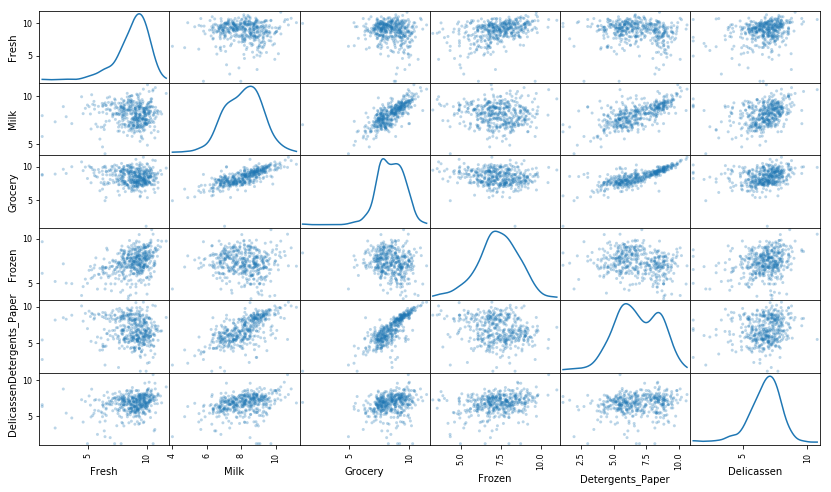

In [65]:
#scatter matrix for transformed data
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

#After applying a natural logarithm scaling to the data, the distribution of each variable appears to be more normal. 

In [66]:
#Dummy variable creation
Channel_dummy=pd.get_dummies(mydata['Channel'])
Region_dummy=pd.DataFrame(pd.get_dummies(mydata['Region']))


In [67]:
#Attaching dummies to the log_data
dummy_data=pd.concat([log_data,Region_dummy,Channel_dummy],axis=1)
dummy_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Lisnon,Oporto,Other,Horeca,Retail channel
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931,0,0,1,0,1
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119,0,0,1,0,1
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504,0,0,1,0,1
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853,0,0,1,1,0
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525,0,0,1,0,1


In [68]:
#Detecting outliers using Tukey's rule

#Tukey’s rule says that the outliers are values more than 1.5 times the interquartile range from the quartiles — either below Q1 − 1.5IQR, or above Q3 + 1.5IQR.

outliers = []

# For each feature find the data points with extreme high or low values
for feature in dummy_data.keys():
    
   # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(dummy_data[feature],25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(dummy_data[feature],75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3-Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(dummy_data[~((dummy_data[feature] >= Q1 - step) & (dummy_data[feature] <= Q3 + step))])
    lista = dummy_data[~((dummy_data[feature] >= Q1 - step) & (dummy_data[feature] <= Q3 + step))].index.tolist()
    outliers.append(lista)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Lisnon,Oporto,Other,Horeca,Retail channel
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523,0,0,1,0,1
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837,0,0,1,1,0
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856,0,0,1,0,1
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856,0,0,1,1,0
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897,0,0,1,0,1
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612,0,0,1,1,0
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337,0,0,1,0,1
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290,0,0,1,0,1
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669,1,0,0,0,1
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382,0,1,0,0,1


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Lisnon,Oporto,Other,Horeca,Retail channel
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723,0,0,1,0,1
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802,0,0,1,1,0
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442,0,0,1,1,0
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275,0,0,1,1,0


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Lisnon,Oporto,Other,Horeca,Retail channel
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437,0,0,1,1,0
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442,0,0,1,1,0


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Lisnon,Oporto,Other,Horeca,Retail channel
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738,0,0,1,0,1
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177,0,0,1,0,1
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523,0,0,1,0,1
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155,0,0,1,0,1
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617,0,0,1,0,1
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827,1,0,0,0,1
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128,0,1,0,1,0
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215,0,0,1,1,0
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446,0,0,1,1,0
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244,0,0,1,1,0


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Lisnon,Oporto,Other,Horeca,Retail channel
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437,0,0,1,1,0
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101,0,0,1,1,0


Data points considered outliers for the feature 'Delicassen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Lisnon,Oporto,Other,Horeca,Retail channel
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837,0,0,1,1,0
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612,0,0,1,0,1
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612,0,0,1,1,0
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519,0,0,1,1,0
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612,0,0,1,1,0
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442,0,0,1,1,0
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768,0,0,1,1,0
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895,0,0,1,1,0
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612,0,0,1,1,0
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372,1,0,0,1,0


Data points considered outliers for the feature 'Lisnon':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Lisnon,Oporto,Other,Horeca,Retail channel
196,10.329539,8.883086,8.496378,9.836867,6.637258,7.964156,1,0,0,1,0
197,7.794411,8.867427,9.248695,7.027315,8.369621,7.291656,1,0,0,0,1
198,9.366147,7.675082,8.828201,8.168203,6.383507,6.546785,1,0,0,1,0
199,9.176784,7.731931,7.655391,6.253829,5.996452,5.849325,1,0,0,1,0
200,8.028455,9.490998,10.048756,8.279190,9.206232,6.594413,1,0,0,0,1
201,8.408271,9.574914,10.114882,8.174421,9.563459,7.427144,1,0,0,0,1
202,10.134718,9.348971,9.157994,8.530109,5.648974,8.832588,1,0,0,1,0
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372,1,0,0,1,0
204,7.578657,6.792344,8.561401,7.232010,1.609438,7.191429,1,0,0,1,0
205,7.009409,9.368284,10.068832,6.861711,9.133999,6.565265,1,0,0,0,1


Data points considered outliers for the feature 'Oporto':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Lisnon,Oporto,Other,Horeca,Retail channel
293,8.293049,9.314971,9.431001,6.804615,8.691483,6.608001,0,1,0,0,1
294,9.965194,7.607381,8.787220,6.812345,6.698268,7.525101,0,1,0,1,0
295,8.934323,7.548029,8.562931,6.033086,7.699842,5.537334,0,1,0,0,1
296,9.856763,7.173192,8.200563,8.021256,6.565265,6.800170,0,1,0,1,0
297,8.998384,8.070594,8.851663,7.282761,8.219326,6.274762,0,1,0,0,1
298,8.818482,8.425078,9.206834,6.839476,8.420242,6.944087,0,1,0,0,1
299,6.095825,6.778785,7.630461,5.575949,5.669881,5.556828,0,1,0,1,0
300,9.707959,8.739216,8.757784,6.714171,7.886833,7.603399,0,1,0,0,1
301,8.572249,9.496722,9.923241,7.500529,9.077038,5.147494,0,1,0,0,1
302,7.967627,8.575839,9.188606,5.897154,8.738094,6.318968,0,1,0,0,1


Data points considered outliers for the feature 'Other':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Lisnon,Oporto,Other,Horeca,Retail channel


Data points considered outliers for the feature 'Horeca':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Lisnon,Oporto,Other,Horeca,Retail channel


Data points considered outliers for the feature 'Retail channel':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Lisnon,Oporto,Other,Horeca,Retail channel


In [69]:
outliers

[[65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412],
 [86, 98, 154, 356],
 [75, 154],
 [38, 57, 65, 145, 175, 264, 325, 420, 429, 439],
 [75, 161],
 [66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343],
 [196,
  197,
  198,
  199,
  200,
  201,
  202,
  203,
  204,
  205,
  206,
  207,
  208,
  209,
  210,
  211,
  212,
  213,
  214,
  215,
  216,
  217,
  218,
  219,
  220,
  221,
  222,
  223,
  224,
  225,
  226,
  227,
  228,
  229,
  230,
  231,
  232,
  233,
  234,
  235,
  236,
  237,
  238,
  239,
  240,
  241,
  242,
  243,
  244,
  245,
  246,
  247,
  248,
  249,
  250,
  251,
  252,
  253,
  254,
  255,
  256,
  257,
  258,
  259,
  260,
  261,
  262,
  263,
  264,
  265,
  266,
  267,
  268,
  269,
  270,
  271,
  272],
 [293,
  294,
  295,
  296,
  297,
  298,
  299,
  300,
  301,
  302,
  303,
  304,
  305,
  306,
  307,
  308,
  309,
  310,
  311,
  312,
  313,
  314,
  315,
  316,
  317,
  318,
  319,
  320,
  321,
  322,
  323

In [70]:
# Detecting outliers that appear in more than one category
seen = {}
dupes = []

for lista in outliers:
    for index in lista:
        if index not in seen:
            seen[index] = 1
        else:
            if seen[index] == 1:
                dupes.append(index)
            seen[index] += 1
dupes = sorted(dupes)
print("Datapoints considered as outliers that are present in more than category are:",dupes)

Datapoints considered as outliers that are present in more than category are: [65, 66, 75, 128, 154, 203, 218, 233, 264, 304, 305, 325, 338]


In [71]:
#Removing outliers
Clean_data = dummy_data.drop(dupes, axis=0).reset_index(drop=True)

In [86]:
Clean_data.shape
Clean_data.head()

#Cleaned data has 427 rows and 11 columns after removing the ouliers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Lisnon,Oporto,Other,Horeca,Retail channel,cluster
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931,0,0,1,0,1,0
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119,0,0,1,0,1,0
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504,0,0,1,0,1,0
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853,0,0,1,1,0,1
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525,0,0,1,0,1,0


# Cluster Analysis

There are two broad types of cluster analysis/clustering

1) Non-heirarchical clustering
2) Heirarchical clustering

# Non-heirarchical clustering - The k-means algorithm

# K-means algorithm - Pseudo code


1) Choose value for K
2) Randomly select K featuresets to start as your centroids
3) Calculate distance(similarity/dissimilarity) of all other feature sets to centroids
4) Classify other featuresets as same as closest centroid
5) Take mean of each class (mean of all feature sets by class), making that mean the new centroid
6) Repeat steps 3-5 until optimized (centroids no longer moving)

Eg: Data set={2,3,4,10,11,12,20,25,30}
    
    K=2
 
    centroid 1 = 4          centroid 2 = 12
    
    cluster 1 = {2,3,4}
    cluster 2 = {10,11,12,20,25,30}

Distance could be calculated using various methods like Euclidean, manhattan etc

Euclidean's distance is the most commonly used method

Euclidean's distance is given by the formula:

√((x1-y1)² + (x2-y2)²


In [73]:
#K-means clustering on the clean data

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [88]:
#Eliminating the dummy variables for building the k-means model

kdata=Clean_data.drop(columns=["Lisnon","Oporto" ,"Other","Horeca","Retail channel"])
kdata.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


In [93]:
#Finding the optimum number of clusters into which the data may be clustered

#Method 1 - The elbow curve

#This method uses WSS(within sum of squares) - It is the is the total distance of data points from their respective cluster centroids.

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(kdata)
    distortions.append(kmeanModel.inertia_)

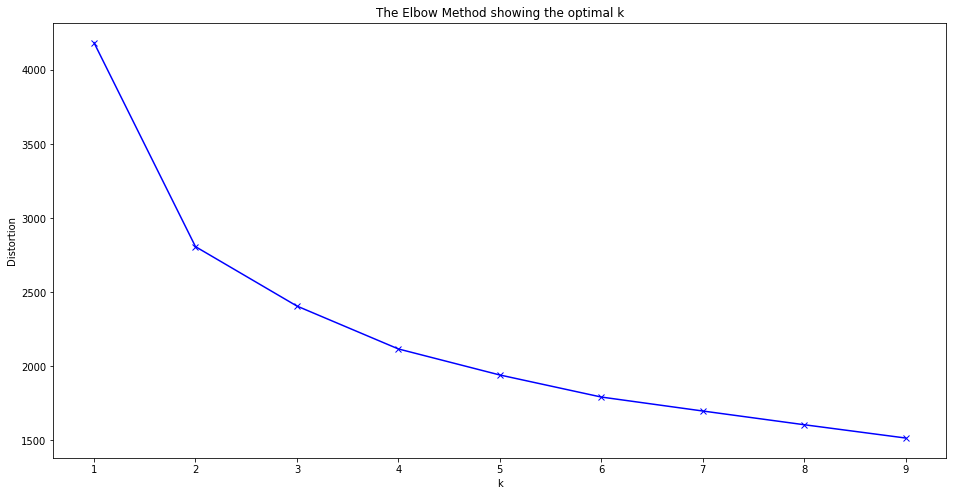

In [94]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [76]:
#Method 2 - The silhouette 

#Silhouette value measures how similar a data point is to its own cluster(cohesion) compared to other clusters(separation)

#Silhouette value ranges between -1 to +1

from sklearn.metrics import silhouette_score



In [95]:
range_n_clusters = list (range(2,10))
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(kdata)
    centers = clusterer.cluster_centers_

    score = silhouette_score(kdata, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.30941996546740974)
For n_clusters = 3, silhouette score is 0.20678945361058737)
For n_clusters = 4, silhouette score is 0.19352642056730965)
For n_clusters = 5, silhouette score is 0.20104635862311077)
For n_clusters = 6, silhouette score is 0.2029315086833709)
For n_clusters = 7, silhouette score is 0.19705080126604052)
For n_clusters = 8, silhouette score is 0.18081607754455767)
For n_clusters = 9, silhouette score is 0.17182458187238997)


In [96]:
#Building the K-means model with 2 clusters

model = KMeans(n_clusters=2)
model.fit(kdata)

KMeans(max_iter=100, n_clusters=2)

In [132]:
print('WSS: ', model.inertia_)
print('\nCentroids: \n', model.cluster_centers_)

pred = model.predict(kdata)
Clean_data['cluster'] = pred #Adding the predictions to the original data
print('\nCount in each cluster: \n', Clean_data['cluster'].value_counts())

#We can see that 2nd cluster has maximum number of samples, while 1st cluster has minimum number of samples.

WSS:  2808.4668158866652

Centroids: 
 [[8.42088297 8.92791421 9.38428297 6.8226158  8.42718415 6.87973996]
 [9.10583578 7.56504961 7.79875586 7.67540205 5.65580621 6.58439339]]

Count in each cluster: 
 1    252
0    175
Name: cluster, dtype: int64


In [98]:
#The below output shows which customer belongs to which cluster

a=pd.DataFrame(model.labels_)
a.head()

#The first customer belongs to the first cluster(0),the second customer also belongs to the first cluster(0) and so on.

,0
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,0
8,0
9,0


In [99]:
cust_seg=a[0].value_counts()
cust_seg

1    252
0    175
Name: 0, dtype: int64

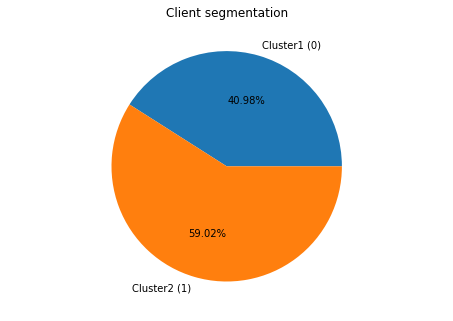

In [100]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
Clusters = ['Cluster1 (0)', 'Cluster2 (1)']
clients = [175,252]
ax.pie(clients, labels = Clusters,autopct='%1.2f%%')
ax.set_title('Client segmentation')
plt.show()



In [101]:
Clean_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Lisnon,Oporto,Other,Horeca,Retail channel,cluster
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931,0,0,1,0,1,0
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119,0,0,1,0,1,0
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504,0,0,1,0,1,0
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853,0,0,1,1,0,1
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525,0,0,1,0,1,0


# Heirarchical clustering - The agglomerative approach

In this approach, all objects start in separate clusters till slowly similar objects are combined and this process is repeated until all objects are in a single cluster.Finally, the optimum number of clusters are chosen from among all options.

In [129]:
#Finding the optimum number of clusters into which the data may be clustered

#Method 1 - The elbow curve

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dummy_data)
    distortions.append(kmeanModel.inertia_)

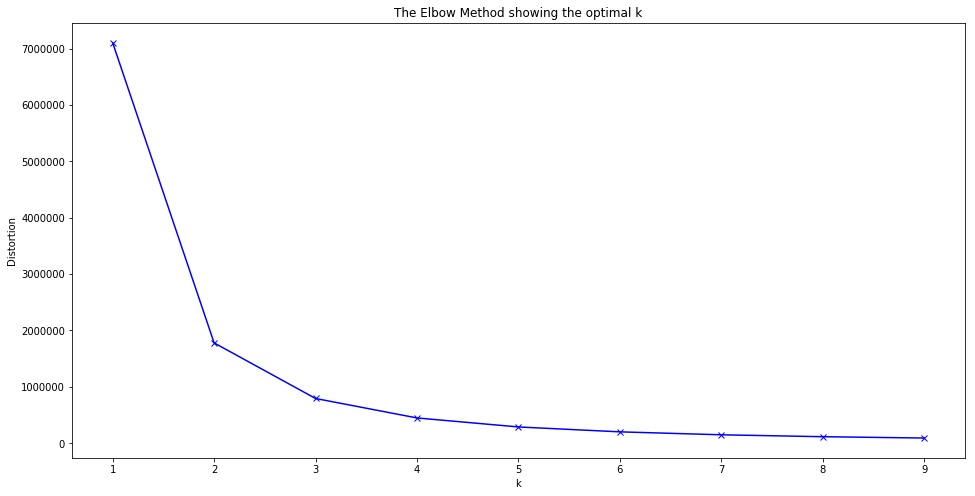

In [130]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [131]:
range_n_clusters = list (range(2,10))
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(dummy_data)
    centers = clusterer.cluster_centers_

    score = silhouette_score(dummy_data, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.623348183087779)
For n_clusters = 3, silhouette score is 0.5839329517438392)
For n_clusters = 4, silhouette score is 0.5623193764812655)
For n_clusters = 5, silhouette score is 0.5480814838500375)
For n_clusters = 6, silhouette score is 0.5367096415887441)
For n_clusters = 7, silhouette score is 0.5264796045767839)
For n_clusters = 8, silhouette score is 0.5184850747145656)
For n_clusters = 9, silhouette score is 0.5108116152150641)


In [102]:
dummy_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Lisnon,Oporto,Other,Horeca,Retail channel
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931,0,0,1,0,1
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119,0,0,1,0,1
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504,0,0,1,0,1
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853,0,0,1,1,0
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525,0,0,1,0,1


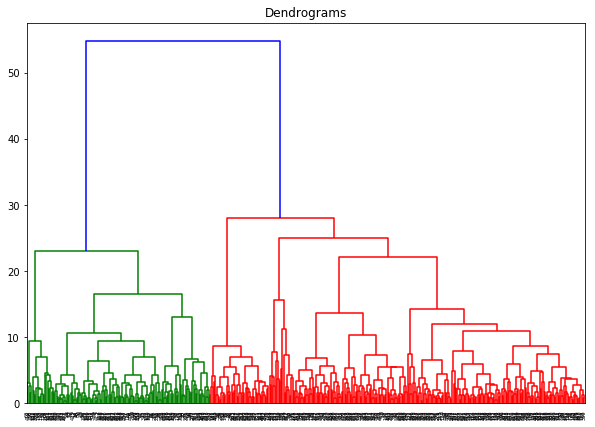

In [103]:
# Dendrogram

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(dummy_data, method='ward'))

In [109]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
preds=cluster.fit_predict(dummy_data)
preds

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,

In [112]:
dummy_data['cluster'] = preds
dummy_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Lisnon,Oporto,Other,Horeca,Retail channel,cluster
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931,0,0,1,0,1,1
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119,0,0,1,0,1,1
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504,0,0,1,0,1,1
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853,0,0,1,1,0,0
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525,0,0,1,0,1,1


In [111]:
dummy_data['cluster'].value_counts()

0    295
1    145
Name: cluster, dtype: int64

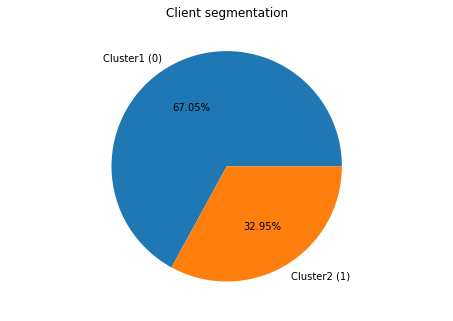

In [113]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
Clusters = ['Cluster1 (0)', 'Cluster2 (1)']
clients = [295,145]
ax.pie(clients, labels = Clusters,autopct='%1.2f%%')
ax.set_title('Client segmentation')
plt.show()


In [118]:
#Adding a new column to the data for pivot table operations
dummy_data['No_of_customers']=1
dummy_data.head()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Lisnon,Oporto,Other,Horeca,Retail channel,cluster,No_of_customers
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931,0,0,1,0,1,1,1
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119,0,0,1,0,1,1,1
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504,0,0,1,0,1,1,1
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853,0,0,1,1,0,0,1
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525,0,0,1,0,1,1,1


In [121]:
a=pd.pivot_table(dummy_data,index=["cluster","Lisnon","Oporto","Other"],values='No_of_customers',aggfunc=len)
a


No_of_customers
cluster Lisnon Oporto Other                 
0       0      0      1                  209
               1      0                   29
        1      0      0                   57
1       0      0      1                  107
               1      0                   18
        1      0      0                   20

In [123]:
b=pd.pivot_table(dummy_data,index=["cluster","Horeca","Retail channel"],values='No_of_customers',aggfunc=len)
b

No_of_customers
cluster Horeca Retail channel                 
0       0      1                             8
        1      0                           287
1       0      1                           134
        1      0                            11

In [125]:
dummy_data.insert(0, 'Client_ID', range(1, 1 + len(dummy_data)))
dummy_data.head()

,Client_ID,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Lisnon,Oporto,Other,Horeca,Retail channel,cluster,No_of_customers
0,1,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931,0,0,1,0,1,1,1
1,2,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119,0,0,1,0,1,1,1
2,3,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504,0,0,1,0,1,1,1
3,4,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853,0,0,1,1,0,0,1
4,5,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525,0,0,1,0,1,1,1


In [126]:
clust1=dummy_data['cluster']==0
clust2=dummy_data['cluster']==1

In [127]:
Cluster1 = dummy_data[clust1]
print(Cluster1.shape)

(295, 14)


In [128]:
Cluster2=dummy_data[clust2]
print(Cluster2.shape)

(145, 14)
